# 1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

# 2: IMPORT DATASETS AND LIBRARIES

In [152]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tensorflow

import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras


In [155]:
# Read stock prices data
stock_price_df = pd.read_csv('rawAmazon.csv')
stock_price_df

,Date,Close
0,2021-11-12,3525.149902
1,2021-11-15,3545.679932
2,2021-11-16,3540.699951
3,2021-11-17,3549.000000
4,2021-11-18,3696.060059
5,2021-11-19,3676.570068
6,2021-11-22,3572.570068
7,2021-11-23,3580.040039
8,2021-11-24,3580.409912
9,2021-11-26,3504.560059


In [156]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,Close
0,2021-11-12,3525.149902
1,2021-11-15,3545.679932
2,2021-11-16,3540.699951
3,2021-11-17,3549.000000
4,2021-11-18,3696.060059
5,2021-11-19,3676.570068
6,2021-11-22,3572.570068
7,2021-11-23,3580.040039
8,2021-11-24,3580.409912
9,2021-11-26,3504.560059


In [158]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
Close    0
dtype: int64

In [160]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    41 non-null     object 
 1   Close   41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 984.0+ bytes


- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Amazon Stock?**


#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [163]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [164]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

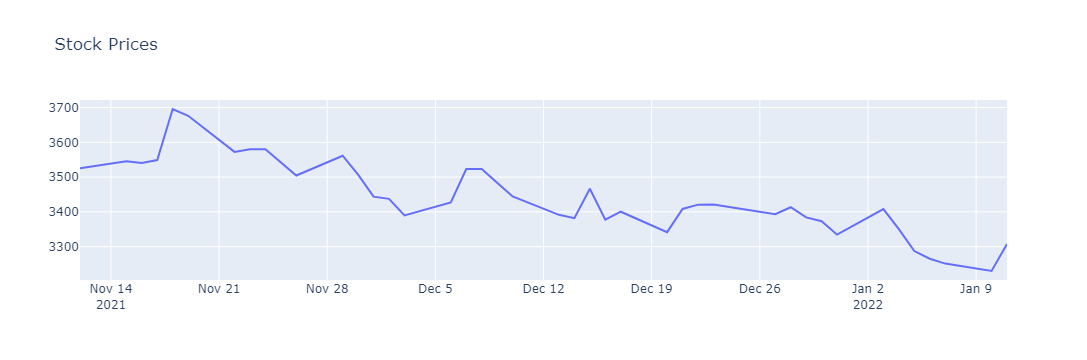

In [165]:
# plot interactive chart for stocks data
interactive_plot(stock_price_df, 'Stock Prices')

**MINI CHALLENGE #2:**
- **Plot the volume dataset for all stocks, list any observations you might see.**
- **Plot the normalized stock prices and volume dataset.**

# TASK #3: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

In [166]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df['Close']})

In [167]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [168]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df)
price_volume_df

,Date,Close
0,2021-11-12,3525.149902
1,2021-11-15,3545.679932
2,2021-11-16,3540.699951
3,2021-11-17,3549.000000
4,2021-11-18,3696.060059
5,2021-11-19,3676.570068
6,2021-11-22,3572.570068
7,2021-11-23,3580.040039
8,2021-11-24,3580.409912
9,2021-11-26,3504.560059


In [169]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Target
0,2021-11-12,3525.149902,3545.679932
1,2021-11-15,3545.679932,3540.699951
2,2021-11-16,3540.699951,3549.000000
3,2021-11-17,3549.000000,3696.060059
4,2021-11-18,3696.060059,3676.570068
5,2021-11-19,3676.570068,3572.570068
6,2021-11-22,3572.570068,3580.040039
7,2021-11-23,3580.040039,3580.409912
8,2021-11-24,3580.409912,3504.560059
9,2021-11-26,3504.560059,3561.570068


In [171]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Target
0,2021-11-12,3525.149902,3545.679932
1,2021-11-15,3545.679932,3540.699951
2,2021-11-16,3540.699951,3549.000000
3,2021-11-17,3549.000000,3696.060059
4,2021-11-18,3696.060059,3676.570068
5,2021-11-19,3676.570068,3572.570068
6,2021-11-22,3572.570068,3580.040039
7,2021-11-23,3580.040039,3580.409912
8,2021-11-24,3580.409912,3504.560059
9,2021-11-26,3504.560059,3561.570068


In [172]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [173]:
price_volume_target_scaled_df

array([[0.61591495, 0.6775312 ],
       [0.66205193, 0.66685234],
       [0.65086046, 0.68465062],
       [0.66951309, 1.        ],
       [1.        , 0.95820649],
       [0.9562003 , 0.73519328],
       [0.72248192, 0.75121157],
       [0.73926913, 0.75200471],
       [0.74010034, 0.58935548],
       [0.56964356, 0.71160534],
       [0.69776171, 0.59473784],
       [0.57528429, 0.45889257],
       [0.43291811, 0.44525474],
       [0.41862564, 0.3432475 ],
       [0.3117218 , 0.42383263],
       [0.39617521, 0.62951926],
       [0.6117353 , 0.62924022],
       [0.61144286, 0.54402347],
       [0.5221355 , 0.46000767],
       [0.43408675, 0.34659282],
       [0.31522771, 0.32617849],
       [0.29383344, 0.50731233],
       [0.48366214, 0.31672154],
       [0.28392253, 0.36589204],
       [0.33545334, 0.23986809],
       [0.20337994, 0.38302544],
       [0.35340918, 0.40961527],
       [0.38127538, 0.41096648],
       [0.38269146, 0.35096687],
       [0.31981172, 0.39348965],
       [0.

In [174]:
price_volume_target_scaled_df.shape

(39, 2)

In [175]:
price_volume_target_scaled_df

array([[0.61591495, 0.6775312 ],
       [0.66205193, 0.66685234],
       [0.65086046, 0.68465062],
       [0.66951309, 1.        ],
       [1.        , 0.95820649],
       [0.9562003 , 0.73519328],
       [0.72248192, 0.75121157],
       [0.73926913, 0.75200471],
       [0.74010034, 0.58935548],
       [0.56964356, 0.71160534],
       [0.69776171, 0.59473784],
       [0.57528429, 0.45889257],
       [0.43291811, 0.44525474],
       [0.41862564, 0.3432475 ],
       [0.3117218 , 0.42383263],
       [0.39617521, 0.62951926],
       [0.6117353 , 0.62924022],
       [0.61144286, 0.54402347],
       [0.5221355 , 0.46000767],
       [0.43408675, 0.34659282],
       [0.31522771, 0.32617849],
       [0.29383344, 0.50731233],
       [0.48366214, 0.31672154],
       [0.28392253, 0.36589204],
       [0.33545334, 0.23986809],
       [0.20337994, 0.38302544],
       [0.35340918, 0.40961527],
       [0.38127538, 0.41096648],
       [0.38269146, 0.35096687],
       [0.31981172, 0.39348965],
       [0.

In [176]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:1]
y = price_volume_target_scaled_df[:,1:]

In [177]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((39, 1), (39, 1))

In [178]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [179]:
X_train.shape, y_train.shape

((25, 1), (25, 1))

In [180]:
X_test.shape, y_test.shape

((14, 1), (14, 1))

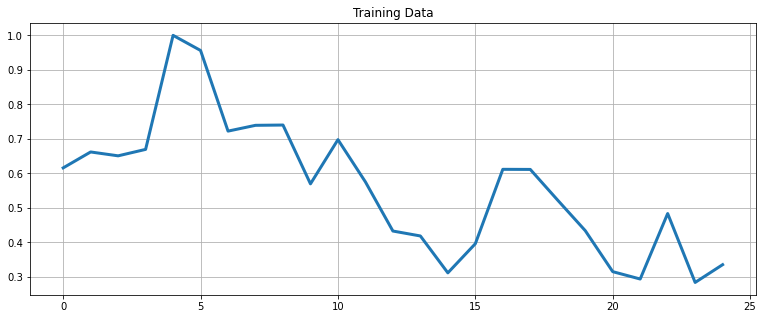

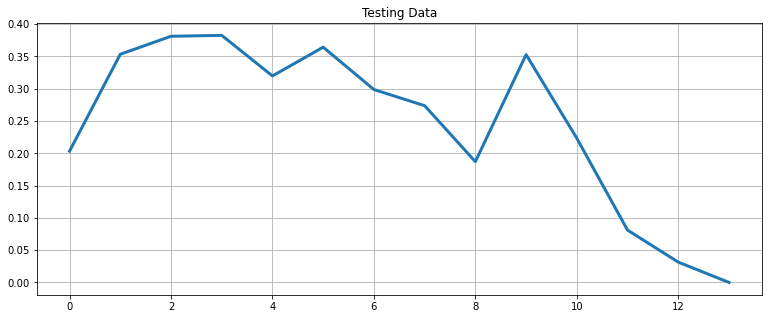

In [181]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


# TASK #4: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [182]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [183]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  -1.294574892539127


In [184]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.5865    ],
       [0.60377136],
       [0.59958184],
       [0.60656444],
       [0.73028209],
       [0.71388569],
       [0.6263933 ],
       [0.63267759],
       [0.63298875],
       [0.56917833],
       [0.6171393 ],
       [0.57128993],
       [0.51799521],
       [0.51264483],
       [0.47262542],
       [0.50424052],
       [0.58493535],
       [0.58482588],
       [0.5513937 ],
       [0.51843268],
       [0.47393785],
       [0.46592892],
       [0.53699121],
       [0.46221877],
       [0.48150931],
       [0.43206768],
       [0.48823107],
       [0.49866277],
       [0.49919288],
       [0.47565387],
       [0.49233638],
       [0.46777125],
       [0.45840778],
       [0.42597687],
       [0.48802075],
       [0.43952124],
       [0.38626863],
       [0.3677103 ],
       [0.35593248]])

In [186]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [187]:
len(Predicted)

39

In [188]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [189]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2021-11-12
1,2021-11-15
2,2021-11-16
3,2021-11-17
4,2021-11-18
5,2021-11-19
6,2021-11-22
7,2021-11-23
8,2021-11-24
9,2021-11-26


In [190]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2021-11-12,0.615915
1,2021-11-15,0.662052
2,2021-11-16,0.650860
3,2021-11-17,0.669513
4,2021-11-18,1.000000
5,2021-11-19,0.956200
6,2021-11-22,0.722482
7,2021-11-23,0.739269
8,2021-11-24,0.740100
9,2021-11-26,0.569644


In [191]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2021-11-12,0.615915,0.586500
1,2021-11-15,0.662052,0.603771
2,2021-11-16,0.650860,0.599582
3,2021-11-17,0.669513,0.606564
4,2021-11-18,1.000000,0.730282
5,2021-11-19,0.956200,0.713886
6,2021-11-22,0.722482,0.626393
7,2021-11-23,0.739269,0.632678
8,2021-11-24,0.740100,0.632989
9,2021-11-26,0.569644,0.569178


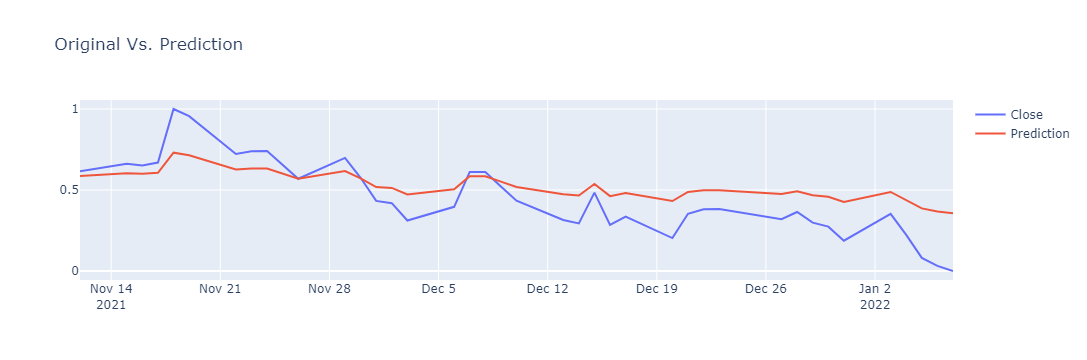

In [192]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

- **Experiment with various regularization values for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**


# TASK #5: RNN MANY TO ONE: TRAIN AN LSTM TIME SERIES MODEL

In [193]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df)
price_volume_df

,Date,Close
0,2021-11-12,3525.149902
1,2021-11-15,3545.679932
2,2021-11-16,3540.699951
3,2021-11-17,3549.000000
4,2021-11-18,3696.060059
5,2021-11-19,3676.570068
6,2021-11-22,3572.570068
7,2021-11-23,3580.040039
8,2021-11-24,3580.409912
9,2021-11-26,3504.560059


In [194]:
# Get the close data as training data (Input)
training_data = price_volume_df.iloc[:, 1:].values
training_data

array([[3525.14990234],
       [3545.67993164],
       [3540.69995117],
       [3549.        ],
       [3696.06005859],
       [3676.57006836],
       [3572.57006836],
       [3580.04003906],
       [3580.40991211],
       [3504.56005859],
       [3561.57006836],
       [3507.07006836],
       [3443.7199707 ],
       [3437.36010742],
       [3389.79003906],
       [3427.37011719],
       [3523.29003906],
       [3523.15991211],
       [3483.41992188],
       [3444.23999023],
       [3391.35009766],
       [3381.83007812],
       [3466.30004883],
       [3377.41992188],
       [3400.35009766],
       [3341.58007812],
       [3408.34008789],
       [3420.73999023],
       [3421.37011719],
       [3393.38989258],
       [3413.2199707 ],
       [3384.02001953],
       [3372.88989258],
       [3334.34008789],
       [3408.09008789],
       [3350.43994141],
       [3287.13989258],
       [3265.08007812],
       [3251.08007812],
       [3229.7199707 ],
       [3307.23999023]])

In [195]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [196]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [197]:
X

[array([0.63350748]),
 array([0.6775312]),
 array([0.66685234]),
 array([0.68465062]),
 array([1.]),
 array([0.95820649]),
 array([0.73519328]),
 array([0.75121157]),
 array([0.75200471]),
 array([0.58935548]),
 array([0.71160534]),
 array([0.59473784]),
 array([0.45889257]),
 array([0.44525474]),
 array([0.3432475]),
 array([0.42383263]),
 array([0.62951926]),
 array([0.62924022]),
 array([0.54402347]),
 array([0.46000767]),
 array([0.34659282]),
 array([0.32617849]),
 array([0.50731233]),
 array([0.31672154]),
 array([0.36589204]),
 array([0.23986809]),
 array([0.38302544]),
 array([0.40961527]),
 array([0.41096648]),
 array([0.35096687]),
 array([0.39348965]),
 array([0.33087451]),
 array([0.30700754]),
 array([0.22434296]),
 array([0.38248935]),
 array([0.25886681]),
 array([0.12312886]),
 array([0.07582472]),
 array([0.04580371]),
 array([0.])]

In [198]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [199]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [200]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((28, 1, 1), (12, 1, 1))

In [201]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 150)            91200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_5 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_8 (LSTM)               (None, 150)               180600    
                                                                 
 dense_2 (Dense)             (None, 1)                 151 

In [202]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 0.3935 - val_loss: 0.1248
Epoch 2/20
1/1 [==============================] - 0s 69ms/step - loss: 0.3852 - val_loss: 0.1204
Epoch 3/20
1/1 [==============================] - 0s 58ms/step - loss: 0.3771 - val_loss: 0.1159
Epoch 4/20
1/1 [==============================] - 0s 76ms/step - loss: 0.3685 - val_loss: 0.1112
Epoch 5/20
1/1 [==============================] - 0s 62ms/step - loss: 0.3587 - val_loss: 0.1062
Epoch 6/20
1/1 [==============================] - 0s 60ms/step - loss: 0.3494 - val_loss: 0.1009
Epoch 7/20
1/1 [==============================] - 0s 41ms/step - loss: 0.3385 - val_loss: 0.0953
Epoch 8/20
1/1 [==============================] - 0s 65ms/step - loss: 0.3270 - val_loss: 0.0893
Epoch 9/20
1/1 [==============================] - 0s 61ms/step - loss: 0.3147 - val_loss: 0.0830
Epoch 10/20
1/1 [==============================] - 0s 61ms/step - loss: 0.3008 - val_loss: 0.0764
Epoch 11/20
1/1 [==============

In [203]:
# Make prediction
predicted = model.predict(X)

In [205]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [206]:
test_predicted

[0.35361862,
 0.36292335,
 0.36066318,
 0.36443123,
 0.432073,
 0.4230161,
 0.3751615,
 0.37857133,
 0.37874025,
 0.34432092,
 0.3701483,
 0.3454525,
 0.31705272,
 0.31422028,
 0.29314506,
 0.30977812,
 0.35277727,
 0.35271844,
 0.33481097,
 0.3172845,
 0.29383314,
 0.28963783,
 0.32713678,
 0.28769714,
 0.29780656,
 0.27198952,
 0.30134004,
 0.30683467,
 0.30711427,
 0.29473305,
 0.30350083,
 0.29060218,
 0.28570542,
 0.26883048,
 0.30122936,
 0.27586186,
 0.24835259,
 0.23885247,
 0.23284692,
 0.22371985]

In [213]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2021-11-15
2,2021-11-16
3,2021-11-17
4,2021-11-18
5,2021-11-19
6,2021-11-22
7,2021-11-23
8,2021-11-24
9,2021-11-26
10,2021-11-29


In [214]:
df_predicted['predictions'] = test_predicted

In [215]:
df_predicted

,Date,predictions
1,2021-11-15,0.353619
2,2021-11-16,0.362923
3,2021-11-17,0.360663
4,2021-11-18,0.364431
5,2021-11-19,0.432073
6,2021-11-22,0.423016
7,2021-11-23,0.375161
8,2021-11-24,0.378571
9,2021-11-26,0.378740
10,2021-11-29,0.344321


In [216]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])


In [217]:
df_predicted['Close'] = close[1:]

In [218]:
df_predicted

,Date,predictions,Close
1,2021-11-15,0.353619,0.677531
2,2021-11-16,0.362923,0.666852
3,2021-11-17,0.360663,0.684651
4,2021-11-18,0.364431,1.000000
5,2021-11-19,0.432073,0.958206
6,2021-11-22,0.423016,0.735193
7,2021-11-23,0.375161,0.751212
8,2021-11-24,0.378571,0.752005
9,2021-11-26,0.378740,0.589355
10,2021-11-29,0.344321,0.711605


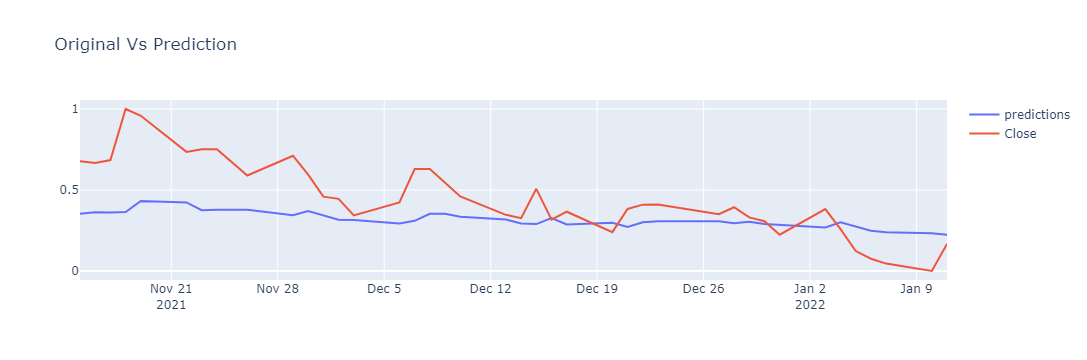

In [219]:
# Plot the data
interactive_plot(df_predicted, "Original Vs Prediction")